# Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Base de datos inicial:

## Importar base de datos:

In [2]:
# Importar base de datos:
Data = pd.read_excel("Data.xlsx")
df = pd.DataFrame(Data)

## Definir variables (Descriptivas, Categoricas y Númericas)

In [3]:
# Identifico las variables descriptivas:
df_descriptivas = df[['Codigo', 'Nombre farmacia', 'Ciudad', 'Departamento']]

# Identifico las variables categoricas:
df_categoricas = df[['Mes', 'Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion']].astype('category')

# Identifico las variables númericas:
variables_numericas = ['Cantidad inventario', 'Valor inventario', 'Area','Fo_dia', 'Item_dia', 'Gasto total',
                       'Ingreso', 'Costo', 'Gasto personal', 'Honorario', 'Impuestos', 
                       'Arrendamientos', 'Contribuciones y afiliaciones', 'Seguros', 'Servicios Publicos',
                       'Call Center', 'Transporte-taxis y buses', 'Gastos Legales', 'Mantto y Reparaciones', 
                       'Adecuaciones e Instal,', 'Gastos de viaje', 'Depreciaciones', 'Diversos', 'Provisiones']
df_numericas = df[variables_numericas]
df_numericas = df_numericas.apply(pd.to_numeric, errors='coerce') #Imputar valores errados

# Concateno las variables descriptivas, categoricas y númericas:
df_final = pd.concat([df_descriptivas,  df_categoricas, df_numericas], axis=1)
# Mostrar las variables identificadas:
#df_final.dtypes

# Base de datos complementarias

## DataFrame 1: Gasto total

In [4]:
# Definir las variables
Gasto_total = ['Gasto total']

# DataFrame
df_gasto_total = df_final[Gasto_total]

## DataFrame 1: Gastos del PyG

In [5]:
# Definir las variables
variables_gasto = ['Gasto total', 'Ingreso', 'Costo', 'Gasto personal', 'Honorario', 'Impuestos', 
                    'Arrendamientos', 'Contribuciones y afiliaciones', 'Seguros', 'Servicios Publicos',
                    'Call Center', 'Transporte-taxis y buses', 'Gastos Legales', 'Mantto y Reparaciones', 
                    'Adecuaciones e Instal,', 'Gastos de viaje', 'Diversos', 'Depreciaciones',
                    'Provisiones']

# DataFrame
df_sum_gastos= df_final[variables_gasto]

## DataFrame 2: Varibles númericas

In [6]:
# Definir las variables
variables_numericas = ['Cantidad inventario', 'Valor inventario', 'Area','Fo_dia', 'Item_dia', 'Gasto total',
                    'Ingreso', 'Costo']

# DataFrame
df_variables_numericas = df_final[variables_numericas]

## DataFrame 3: Variables categoricas

In [7]:
## DataFrame 2: Varibles categoricas

variables_categoricas = ['Mes', 'Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion']

# DataFrame
df_variables_categoricas = df_final[variables_categoricas]


# Analisis exploratorio:

## Analisis varible objetivo: Gasto total

### Mapa de calor: Gasto total

#### Grafico:

C:\Users\Jorge\AppData\Local\Temp\ipykernel_2680\829018636.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_values_millions.index, y=mean_values_millions.values, palette='viridis')


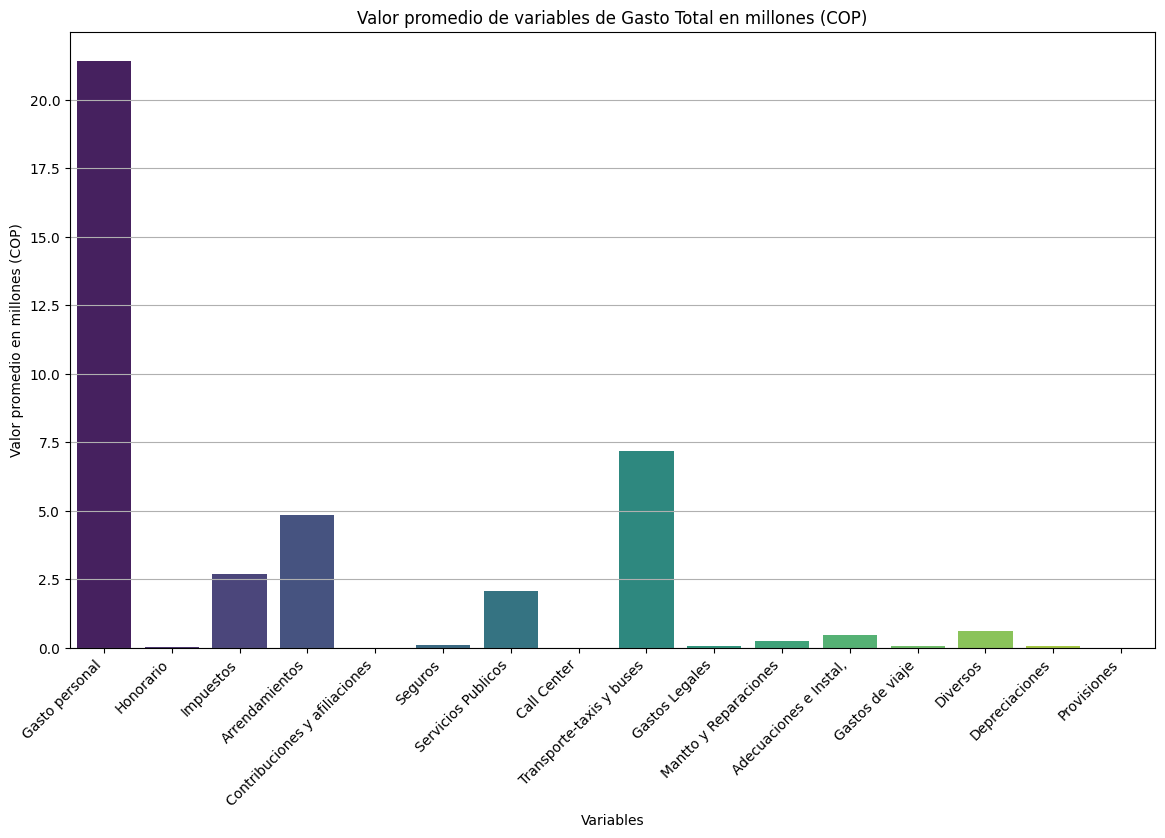

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables a graficar
variables_solo_gt = ['Gasto personal', 'Honorario', 'Impuestos', 
                     'Arrendamientos', 'Contribuciones y afiliaciones', 'Seguros', 'Servicios Publicos',
                     'Call Center', 'Transporte-taxis y buses', 'Gastos Legales', 'Mantto y Reparaciones', 
                     'Adecuaciones e Instal,', 'Gastos de viaje', 'Diversos', 'Depreciaciones',
                     'Provisiones']

# Filtrar el DataFrame para solo incluir las variables numéricas
df_solo_gt = df_final[variables_solo_gt]

# Calcular el valor promedio de cada variable
mean_values = df_solo_gt.mean()

# Convertir los valores a millones
mean_values_millions = mean_values / 1_000_000

# Crear la gráfica de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=mean_values_millions.index, y=mean_values_millions.values, palette='viridis')

# Ajustar el título y las etiquetas
plt.title('Valor promedio de variables de Gasto Total en millones (COP)')
plt.xlabel('Variables')
plt.ylabel('Valor promedio en millones (COP)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Mostrar la gráfica
plt.show()



Text(0.5, 1.0, 'Mapa de Calor de Correlación')

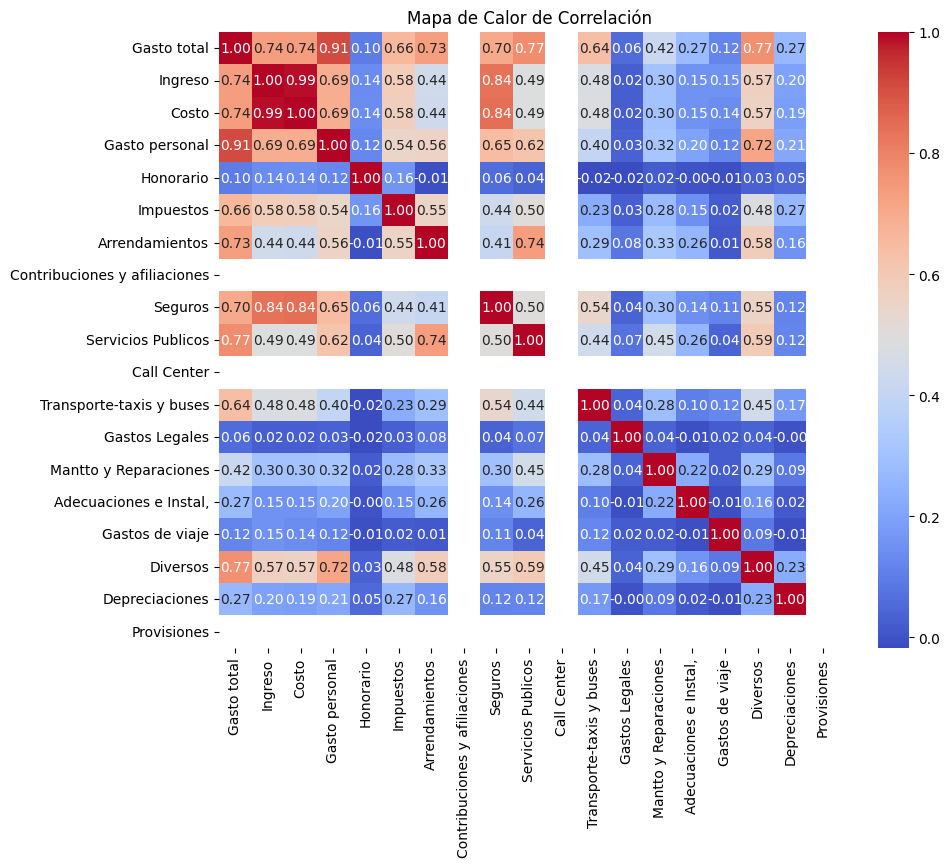

In [9]:
#1. CONSTRUIR DATA FRAME

# Traer DataFrame:
df_sum_gastos

#2. REALIZAR MAPA DE CALOR

# Calcular la matriz de correlación
correlacion = df_sum_gastos.corr()
# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 8))
# Crear el mapa de calor de correlación
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
# Rotar las etiquetas de los ejes
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# Agregar título
plt.title('Mapa de Calor de Correlación')

#### Conclusión: 

- De acuerdo al gráficod de calor, se evidencia la variable que más aporta al Gato total es el Gasto de personal, seguido por las variables Arrendamiento, Servicios publicos y Diversos,
- Se evidencia que el Ingreso y el Costo tiene correlación similar al gasto total
- La depreciación se muestra como la variable de menor correlación, lo anterior corresponde a que esta se aplica cuando un centro de atención fue trasladado o aperturado recientemente, es decir, tiene asociado con el un gasto que se deprecia cada mes. Debido a que es una variable que no es común en todas las farmacias puede generar que afecte el modelo, por lo cual, se elimina para el pronostico del modelo.

### Correlación Gasto total vs Variables númericas

#### Grafico:

Matriz de p-valores:
                       Gasto total  Cantidad inventario  Valor inventario  \
Gasto total                    NaN         0.000000e+00     2.087040e-108   
Cantidad inventario   0.000000e+00                  NaN      7.786090e-24   
Valor inventario     2.087040e-108         7.786090e-24               NaN   
Area                  0.000000e+00         0.000000e+00      4.096414e-36   
Fo_dia                0.000000e+00         0.000000e+00      1.000101e-21   
Item_dia             8.790780e-303        4.171674e-247      7.562912e-19   
Gasto total           0.000000e+00         0.000000e+00     2.087040e-108   
Ingreso               0.000000e+00        1.493042e-187      0.000000e+00   
Costo                 0.000000e+00        1.043380e-184      0.000000e+00   

                              Area         Fo_dia       Item_dia  \
Gasto total           0.000000e+00   0.000000e+00  8.790780e-303   
Cantidad inventario   0.000000e+00   0.000000e+00  4.171674e-247   
Valo

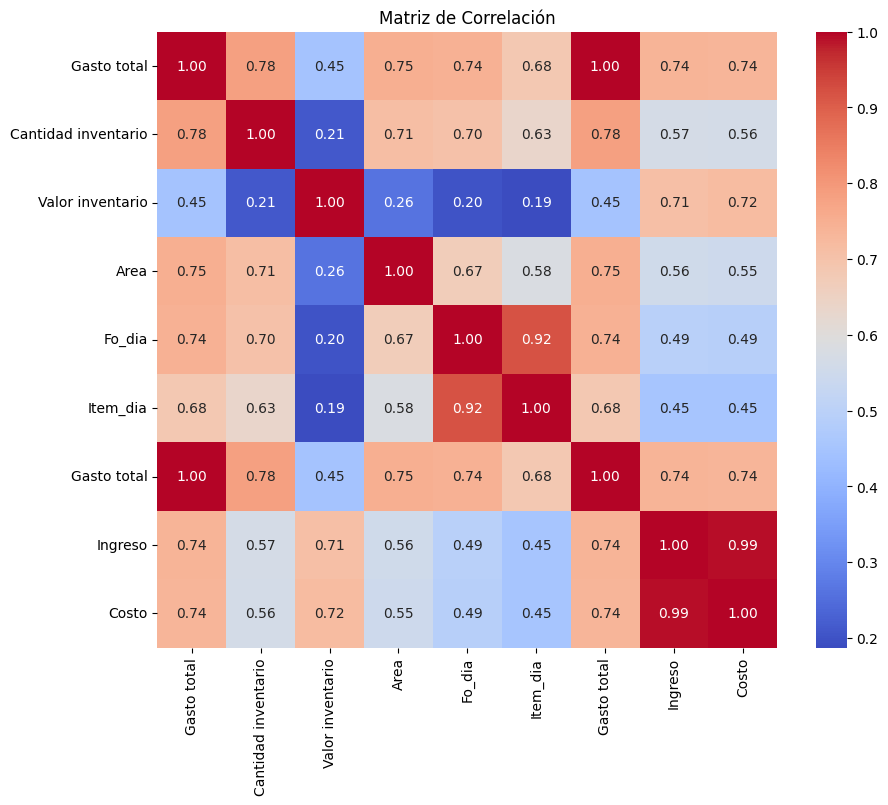

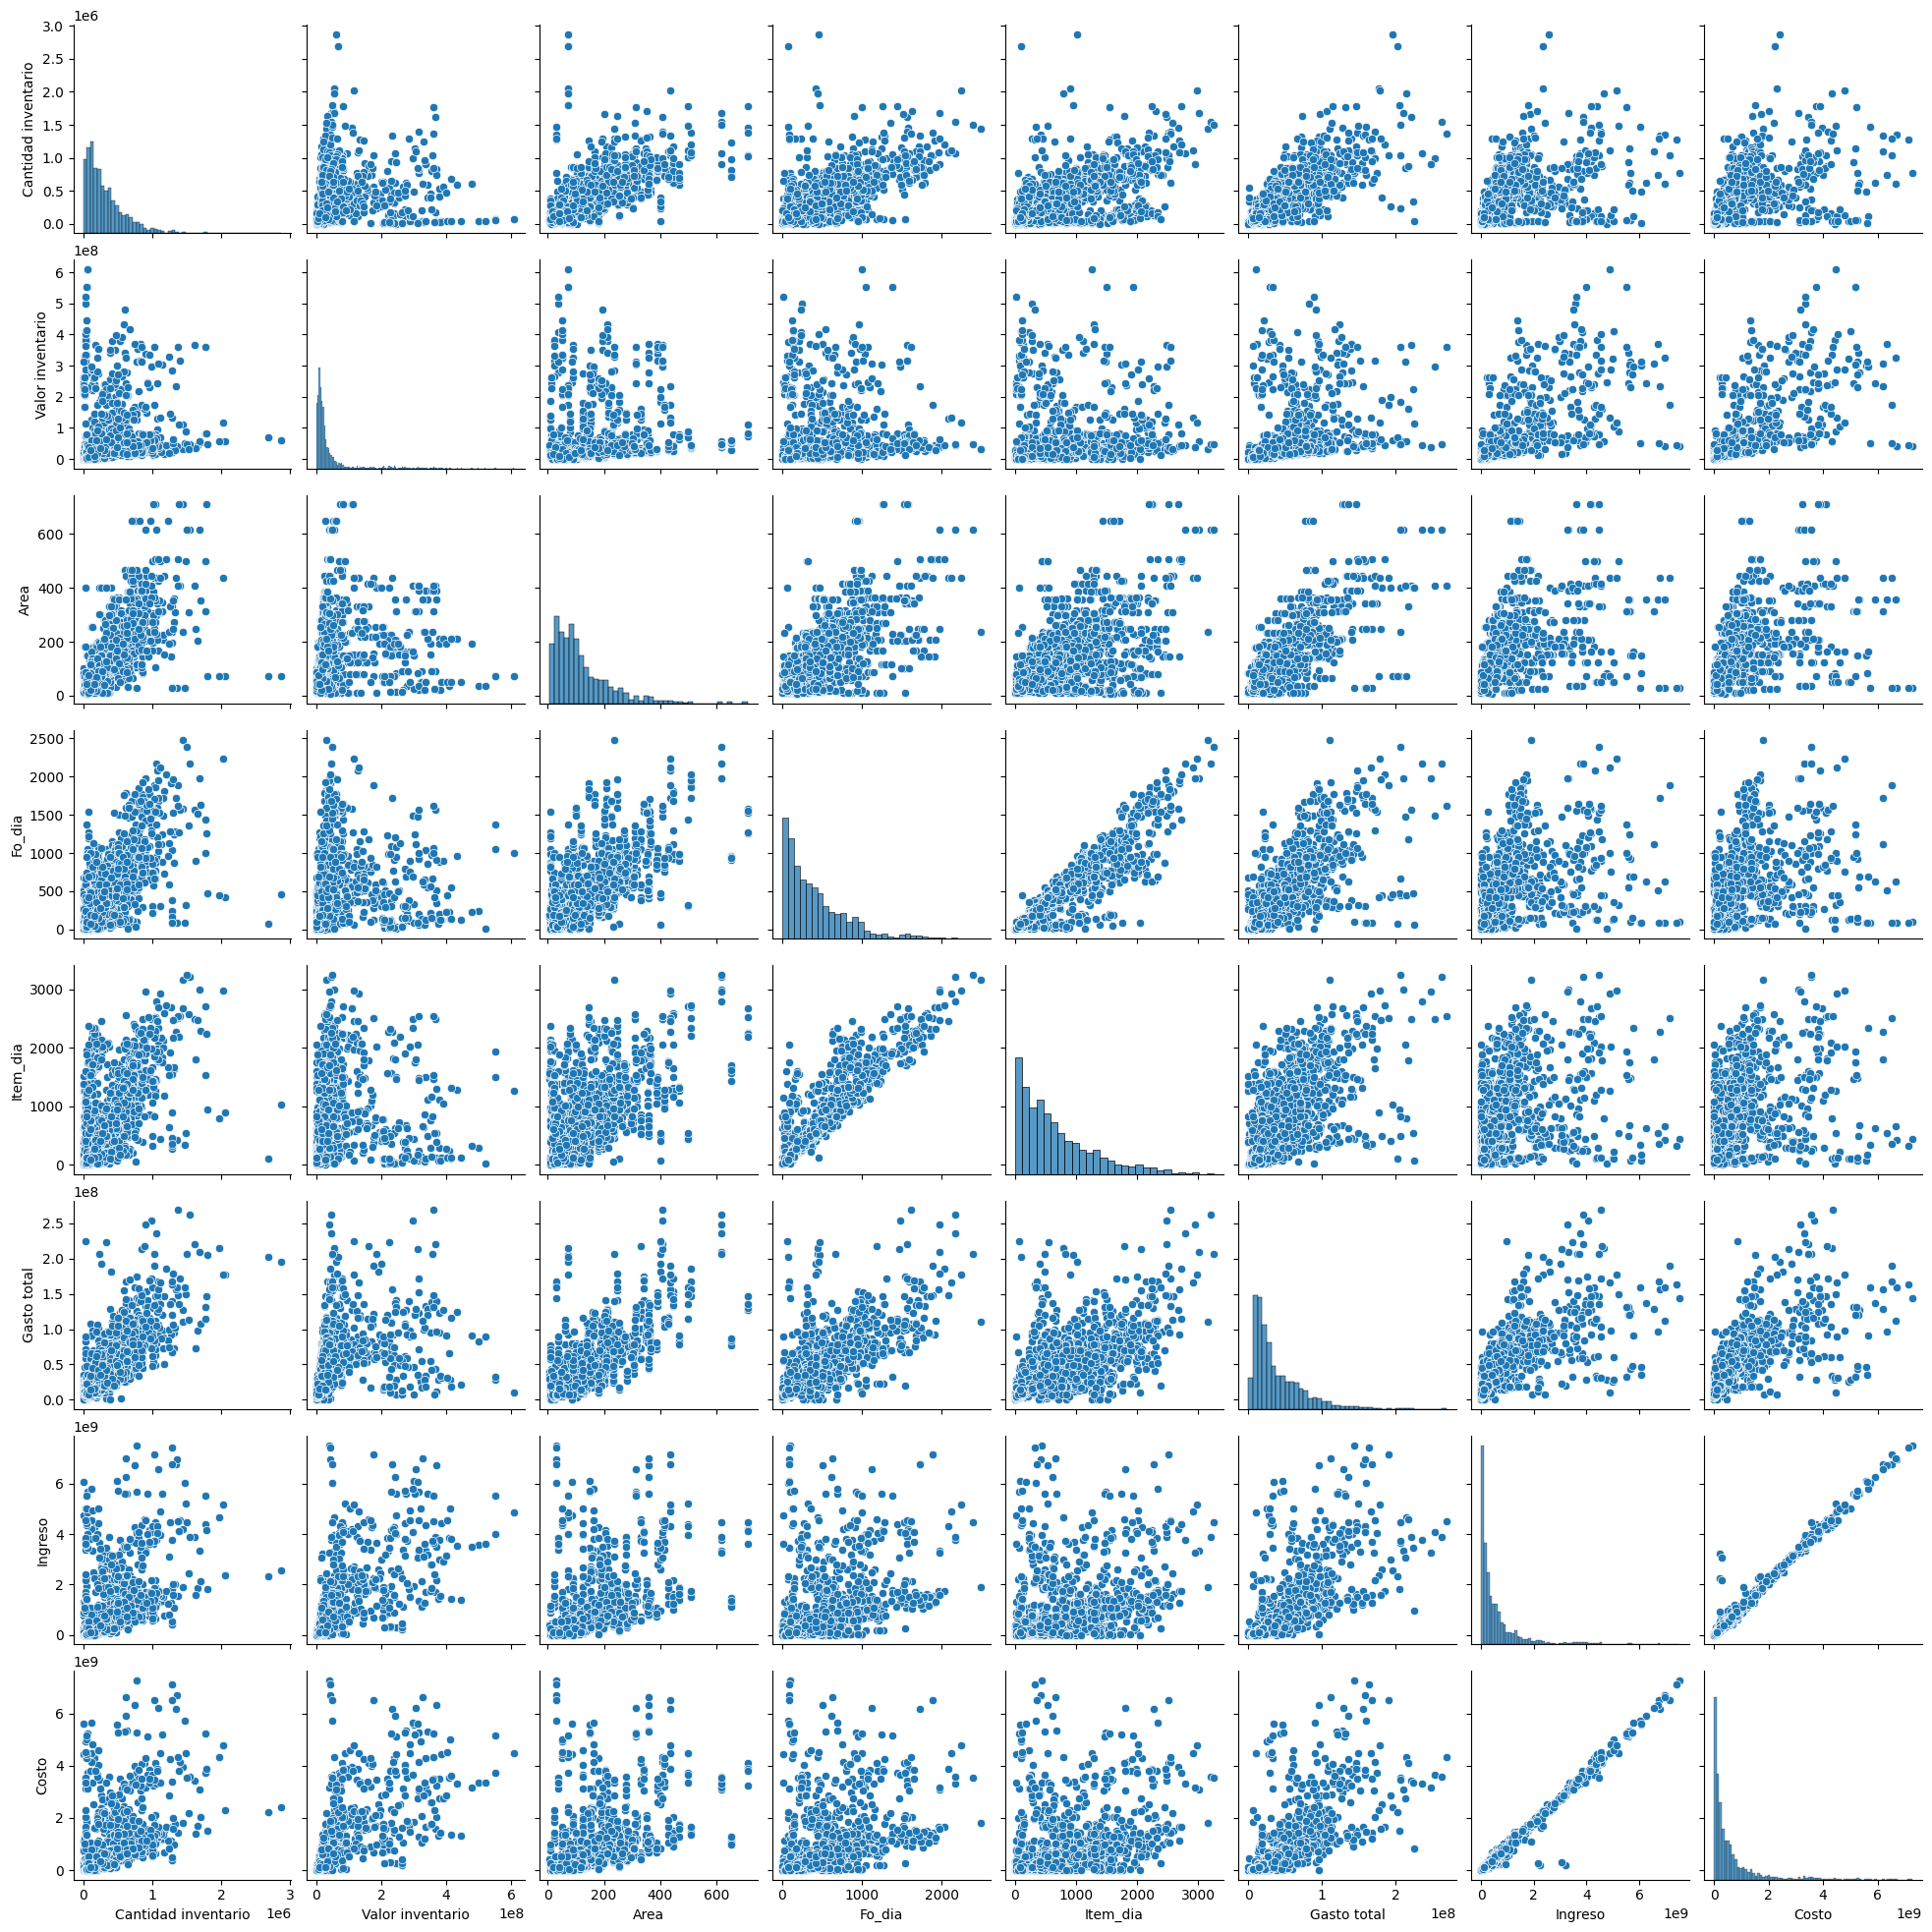

In [10]:
import scipy.stats as stats

# Llamar DataFrame:
df_gasto_total
df_variables_numericas

# Concatenar variables a trabajar:
df_corr_var_num = pd.concat([df_gasto_total, df_variables_numericas], axis=1)

# Calcular la matriz de correlación
correlation_matrix_numerica = df_corr_var_num.corr()

# Crear una matriz de valores p
def compute_p_values(df):
    df = df.copy()
    p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in range(df.shape[1]):
        for j in range(i+1):
            if i == j:
                p_values.iloc[i, j] = np.nan
            else:
                _, p_value = stats.pearsonr(df.iloc[:, i], df.iloc[:, j])
                p_values.iloc[i, j] = p_value
                p_values.iloc[j, i] = p_value
    return p_values

p_value_matrix = compute_p_values(df_corr_var_num)

# Mostrar la matriz de p-valores
print("Matriz de p-valores:")
print(p_value_matrix)

# Calcular la matriz de correlación
correlation_matrix_numerica = df_corr_var_num.corr()

# Mostrar la matriz de correlación
print(correlation_matrix_numerica)

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numerica, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Crear gráficos de dispersión para las nuevas variables
sns.pairplot(df_variables_numericas)
plt.show()

### Conclusión:

- Se evidencia que el Gasto total tiene relaciones relativamente lineal con las otras variables a excepción del Valor de inventario, por lo cual, se podría examinar eliminar esta del **Modelo final**

- En la variable Cantidad de inventario siempre se tiene dos puntos atipicos al final, se puede revisar para la eliminación de estos puntos.

- Valor inventario y Cantidad inventario no tienen una relación tan lineal como se esperaba.

- Fo_dia e Item_dia y Ingreso y Costo tiene una relación bastante lineal, por lo cual se puede eximinar fusionar dichas variables en el **Modelo final**

- En las graficas se evidencia que las correlaciones en su mayoria están orientadas hacia lo números bajos, evidenciando que la mayor a de farmacias son de tamaño pequeño.

### Correlación: Gasto total vs Variables categoricas (No Binomiales)

In [11]:
from scipy.stats import f_oneway

# Llamar variables:
variables_no_binomiales = ['Mes', 'Nivel ciudad', 'Tipo CAF', 'Cantidad clientes', 'Ubicacion']
Gasto_total

# Realizar ANOVA para cada variable categórica no binaria:
anova_results = {}
for var in variables_no_binomiales:
    groups = [df_final[df_final[var] == category][Gasto_total] for category in df_final[var].unique()]
    anova_results[var] = f_oneway(*groups)

# Mostrar resultados
for var, result in anova_results.items():
    print(f'ANOVA para {var}: F-statistic = {result.statistic}, p-value = {result.pvalue}')

ANOVA para Mes: F-statistic = [3.67533138], p-value = [0.00546333]
ANOVA para Nivel ciudad: F-statistic = [127.82257699], p-value = [2.56882788e-76]
ANOVA para Tipo CAF: F-statistic = [149.82386753], p-value = [2.45097726e-88]
ANOVA para Cantidad clientes: F-statistic = [73.10140499], p-value = [2.55093355e-129]
ANOVA para Ubicacion: F-statistic = [30.4063158], p-value = [3.20404695e-35]


#### Conclusión:

Todos los p-valores son extremadamente bajos (mucho menores que 0.05), lo que indica que en cada caso, las diferencias en Gasto total entre los diferentes niveles de las variables (Mes, Nivel Ciudad, Tipo CAF, cantida clientes y Ubicación) son estadísticamente significativas.

Las altas estadísticas F sugieren que estas variables tienen un impacto considerable en Gasto total. En particular Tipo CAF.

## Correlación: Gasto total vs Variables categoricas (Binomiales)

In [12]:
from scipy.stats import pointbiserialr

# Llamo mi DataFrame:
df_binarias = df[['Ambulatorio', '24 horas', 'Alto volumen', 'Consorcio', 'Gasto total']]

# Variables categóricas que deben ser convertidas a binarias
variables_binarias = ['Ambulatorio', '24 horas', 'Alto volumen', 'Consorcio']
variable_continua = 'Gasto total'

# Función para convertir variables categóricas con valores 'Sí'/'No' a binarios
def convert_yes_no_to_binary(df, var):
    if df[var].isin(['SI', 'NO']).all():
        df[var] = df[var].apply(lambda x: 1 if x == 'SI' else 0)
    else:
        print(f"{var} contiene valores distintos de 'Sí' y 'No'.")

# Convertir las variables a binarias
for var in variables_binarias:
    convert_yes_no_to_binary(df_binarias, var)

# Calcular la Correlación Biserial Puntual
print("Correlación Biserial Puntual:")
for var in variables_binarias:
    if df_binarias[var].nunique() == 2:  # Verifica que la variable sea binaria
        correlation, p_value = pointbiserialr(df_binarias[var], df_binarias[variable_continua])
        print(f"Correlación biserial puntual para {var}: [{correlation:.4f}], p-value = [{p_value:.8f}]")
    else:
        print(f"{var} no se pudo convertir a binaria o tiene más de dos categorías.")

Correlación Biserial Puntual:
Correlación biserial puntual para Ambulatorio: [0.1113], p-value = [0.00000017]
Correlación biserial puntual para 24 horas: [0.2173], p-value = [0.00000000]
Correlación biserial puntual para Alto volumen: [0.0775], p-value = [0.00027511]
Correlación biserial puntual para Consorcio: [-0.3089], p-value = [0.00000000]


C:\Users\Jorge\AppData\Local\Temp\ipykernel_2680\4073265225.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].apply(lambda x: 1 if x == 'SI' else 0)


#### Conclusión:

La correlación biserial puntual mide la relación entre una variable binaria (en este caso, representada por 0 y 1) y una variable continua. En donde 1 es que se tiene una relación fuerte, 0 donde no se tiene relación y -1 se tiene un relación fuerte pero inversa a la variable objetivo. 

Un p-valor bajo (típicamente menor a 0.05) sugiere que la correlación observada es significativamente diferente de cero y no es debida al azar.

En este caso, se evidencia que las vaiables Consorcio y 24 horas tiene una significación con la variable objetivo un poco más alta que las variables Ambulatorio y Alto volumen-

## Participación por farmacias:

C:\Users\Jorge\AppData\Local\Temp\ipykernel_2680\3192460433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Ambulatorio', data=df_final, palette='viridis')


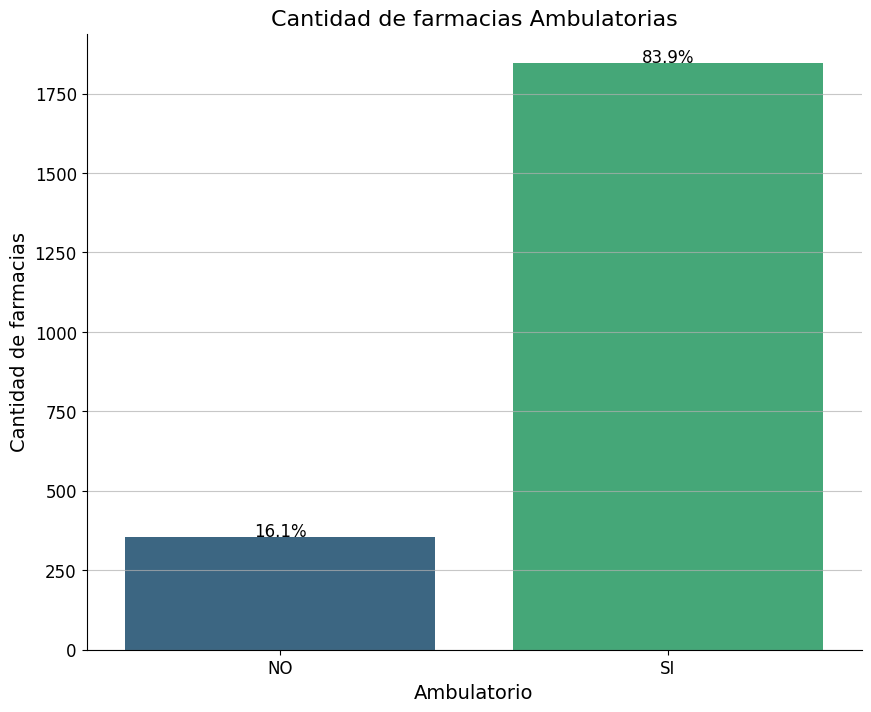

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajusto el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Realizo gráfico
ax = sns.countplot(x='Ambulatorio', data=df_final, palette='viridis')

# Nombre de etiquetas
plt.title('Cantidad de farmacias Ambulatorias', fontsize=16)
plt.xlabel('Ambulatorio', fontsize=14)
plt.ylabel('Cantidad de farmacias', fontsize=14)

# Rotar las etiquetas de los ejes
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Añadir porcentajes encima de las barras
total = len(df_final)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 1  # Ajustar la posición vertical
    ax.annotate(percentage, (x, y), ha='center', fontsize=12, color='black')

# Mejorar la apariencia del gráfico
sns.despine()
plt.grid(axis='y', alpha=0.7)

# Mostrar gráfico
plt.show()

# Modelo:

In [14]:
# 1. DESCARGAR LIBRERIAS NECESARIAS:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. BASE DE DATOS

# Base de datos inicial:
df_final

#Base de datos para mi modelo:
df_modelo_1 = df_final[['Mes', 'Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                        'Cantidad clientes', 'Consorcio', 'Ubicacion','Cantidad inventario', 
                        'Valor inventario', 'Area','Fo_dia', 'Item_dia','Ingreso', 'Costo', 'Gasto total']]

# 3. OBTENGO VAIRBALES DE CARACTERISTICAS Y OBJETIVO (PARA ENTRENAMIENTO Y PRUEBA)

X_1 = df_modelo_1.drop('Gasto total', axis=1)
y_1 = df_modelo_1['Gasto total']

# 4. PROCESAMIENTO DE VARIABLES

var_categoricas_1 = ['Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion'] 

var_numericas_1 = ['Cantidad inventario', 'Valor inventario', 'Area','Fo_dia', 'Item_dia','Ingreso', 
                   'Costo']

# Preprocesamiento para variables categóricas
categorical_transformer_1 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocesamiento para variables numéricas
numeric_transformer_1 = Pipeline(steps=[('scaler', StandardScaler())])

# Combinar los preprocesadores en un único paso
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_1, var_numericas_1),
        ('cat', categorical_transformer_1, var_categoricas_1) ])

# 5. DIVIDIR: ENTRENAMIENTO Y PRUEBA

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

## Regresión lineal

In [15]:
# Crear el pipeline con preprocesamiento y regresión lineal
model_lr_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model_lr_1.fit(X_train_1, y_train_1)


from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones
y_pred_lr_1 = model_lr_1.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_1, y_pred_lr_1):
    # Evitar división por cero
    nonzero_indices = y_test_1 != 0
    y_test_nonzero = y_test_1[nonzero_indices]
    y_pred_lr_nonzero = y_pred_lr_1[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_lr_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_lr_1)
mae = mean_absolute_error(y_test_1, y_pred_lr_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_lr_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.85
MAE (Mean Absolute Error): 9191889
MAPE (Mean Absolute Percentage Error): 68.43%


## Regresión Ridge

In [16]:
# Crear el pipeline con preprocesamiento y regresión Ridge
model_ridge_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Entrenar el modelo
model_ridge_1.fit(X_train_1, y_train_1)

# Hacer predicciones
y_pred_ridge_1 = model_ridge_1.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_1, y_pred_ridge_1):
    # Evitar división por cero
    nonzero_indices = y_test_1 != 0
    y_test_nonzero = y_test_1[nonzero_indices]
    y_pred_ridge_nonzero = y_pred_ridge_1[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_ridge_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_ridge_1)
mae = mean_absolute_error(y_test_1, y_pred_ridge_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_ridge_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.85
MAE (Mean Absolute Error): 9183749
MAPE (Mean Absolute Percentage Error): 68.54%


## Random Forest

In [17]:
# Crear el pipeline con preprocesamiento y random forest
model_rf_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model_rf_1.fit(X_train_1, y_train_1)

# Hacer predicciones
y_pred_rf_1 = model_rf_1.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_1, y_pred_rf_1):
    # Evitar división por cero
    nonzero_indices = y_test_1 != 0
    y_test_nonzero = y_test_1[nonzero_indices]
    y_pred_rf_nonzero = y_pred_rf_1[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_rf_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_rf_1)
mae = mean_absolute_error(y_test_1, y_pred_rf_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_rf_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.93
MAE (Mean Absolute Error): 5780648
MAPE (Mean Absolute Percentage Error): 32.13%


## Random Forest (Mejor parametro)

In [18]:
# Definir el diccionario de parámetros
param_distributions_1 = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

# Búsqueda de hiperparámetros usando RandomizedSearchCV
random_search_1 = RandomizedSearchCV(estimator=model_rf_1, param_distributions=param_distributions_1, 
                                   n_iter=20, cv=5, scoring='neg_mean_absolute_error', 
                                   n_jobs=-1, verbose=2, random_state=42)

# Ajustar el modelo a los datos
random_search_1.fit(X_train_1, y_train_1)

# Usar los mejores parámetros para predecir en el conjunto de prueba
best_model_1 = random_search_1.best_estimator_

# Hacer predicciones
y_pred_rf_best_1 = best_model_1.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_1, y_pred_rf_best_1):
    # Evitar división por cero
    nonzero_indices = y_test_1 != 0
    y_test_nonzero = y_test_1[nonzero_indices]
    y_pred_rf_nonzero = y_pred_rf_best_1[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_rf_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_rf_best_1)
mae = mean_absolute_error(y_test_1, y_pred_rf_best_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_rf_best_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jorge\AppDa

R² (R-squared): 0.93
MAE (Mean Absolute Error): 5275570
MAPE (Mean Absolute Percentage Error): 28.85%


## Gradient Boosting Machines (GBM)

In [19]:
# Crear el pipeline con GradientBoostingRegressor
model_gbm_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Ajustar el modelo a los datos
model_gbm_1.fit(X_train_1, y_train_1)

# Hacer predicciones
y_pred_gbm_1 = model_gbm_1.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_1, y_pred_rf_best_1):
    # Evitar división por cero
    nonzero_indices = y_test_1 != 0
    y_test_nonzero = y_test_1[nonzero_indices]
    y_pred_nonzero = y_pred_gbm_1[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_gbm_1)
mae = mean_absolute_error(y_test_1, y_pred_gbm_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_gbm_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.90
MAE (Mean Absolute Error): 6992885
MAPE (Mean Absolute Percentage Error): 41.41%


## Modelo de ensamble

In [20]:
# Modelos base
estimators_1 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Modelo meta
meta_regressor_1 = Ridge()

# Crear el modelo ensemble
ensemble_model_1 = StackingRegressor(
    estimators=estimators_1,
    final_estimator=meta_regressor_1
)

# Pipeline con preprocesamiento y modelo ensemble
model_ensemble_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ensemble_model_1)
])

# Entrenar el modelo
model_ensemble_1.fit(X_train_1, y_train_1)

# Hacer predicciones
y_pred_ensemble_1 = model_ensemble_1.predict(X_test_1)

# Calcular otras métricas
r2 = r2_score(y_test_1, y_pred_ensemble_1)
mae = mean_absolute_error(y_test_1, y_pred_ensemble_1)
mape = mean_absolute_percentage_error(y_test_1, y_pred_ensemble_1)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.93
MAE (Mean Absolute Error): 5746962
MAPE (Mean Absolute Percentage Error): 41.41%


## Conclusiones:

### Ajuste del modelo

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo
modelo_ajuste_1 = RandomForestRegressor(random_state=40)

# Crear un pipeline completo
pipeline_ajuste_1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', modelo_ajuste_1)])

# Entrenar el modelo
pipeline_ajuste_1.fit(X_train_1, y_train_1)

# Realizar predicciones
y_train_ajuste_1 = pipeline_ajuste_1.predict(X_train_1)
y_test_ajuste_1 = pipeline_ajuste_1.predict(X_test_1)

# Evaluar el modelo en el conjunto de datos de entrenamiento
mae_train_1 = mean_absolute_error(y_train_1, y_train_ajuste_1)
r2_train_1 = r2_score(y_train_1, y_train_ajuste_1)

# Calcular MAPE para el conjunto de datos de entrenamiento
epsilon = 1e-10  # Añadir un pequeño valor para evitar la división por cero
mape_train_1 = np.mean(np.abs((y_train_1 - y_train_ajuste_1) / (y_train_1 + epsilon))) * 100

print(f'Entrenamiento - MAE: {mae_train_1:.0f}, R2: {r2_train_1:.2f}, MAPE: {mape_train_1:.2f}%')

# Evaluar el modelo en el conjunto de datos de prueba
mae_test_1 = mean_absolute_error(y_test_1, y_test_ajuste_1)
r2_test_1 = r2_score(y_test_1, y_test_ajuste_1)

# Calcular MAPE para el conjunto de datos de prueba
mape_test_1 = np.mean(np.abs((y_test_1 - y_test_ajuste_1) / (y_test_1 + epsilon))) * 100

print(f'Prueba - MAE: {mae_test_1:.0f}, R2: {r2_test_1:.2f}, MAPE: {mape_test_1:.2f}%')

Entrenamiento - MAE: 2224536, R2: 0.99, MAPE: 22.24%
Prueba - MAE: 5726121, R2: 0.93, MAPE: 33.53%


Entrenamiento
El MAE y el MSE son bajos en el conjunto de entrenamiento, y el 𝑅2 está muy cerca de 1, lo que indica que el modelo se ajusta muy bien a los datos de entrenamiento.

Prueba
El MAE y el MSE son significativamente mayores en el conjunto de prueba en comparación con el conjunto de entrenamiento, y el R2 ha disminuido a 0.9255. Esto sugiere que el modelo no generaliza tan bien a nuevos datos.

Diagnóstico
Sobreajuste (Overfitting):
Síntomas: El modelo tiene un rendimiento excepcionalmente bueno en el conjunto de entrenamiento pero muestra una degradación considerable en el conjunto de prueba.
Causa: El modelo ha aprendido demasiado bien los detalles y el ruido del conjunto de entrenamiento, lo que afecta su capacidad para generalizar.

Si hay Sobreajuste:
Reducción de Dimensionalidad: Usar PCA o seleccionar solo las características más importantes.

# Modelo con reducción de dimenciones PCA

In [22]:
from sklearn.decomposition import PCA

# 2. BASE DE DATOS

# Base de datos inicial:
df_final

# Base de datos para mi modelo:
df_modelo_2 = df_final[['Mes', 'Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                        'Cantidad clientes', 'Consorcio', 'Ubicacion', 'Cantidad inventario', 
                        'Valor inventario', 'Area', 'Fo_dia', 'Item_dia', 'Ingreso', 'Costo', 'Gasto total']]

# 3. OBTENGO VARIABLES DE CARACTERÍSTICAS Y OBJETIVO (PARA ENTRENAMIENTO Y PRUEBA)

X_2 = df_modelo_2.drop('Gasto total', axis=1)
y_2 = df_modelo_2['Gasto total']

# 4. PROCESAMIENTO DE VARIABLES

var_categoricas_2 = ['Ambulatorio', 'Nivel ciudad', '24 horas', 'Alto volumen', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion'] 

var_numericas_2 = ['Cantidad inventario', 'Valor inventario', 'Area', 'Fo_dia', 'Item_dia', 'Ingreso', 
                   'Costo']

# Preprocesamiento para variables categóricas
categorical_transformer_2 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocesamiento para variables numéricas
numeric_transformer_with_pca = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95))])

# Combinar los preprocesadores en un único paso
preprocessor_with_pca = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_with_pca, var_numericas_2),
        ('cat', categorical_transformer_2, var_categoricas_2)
    ])

# 5. DIVIDIR: ENTRENAMIENTO Y PRUEBA
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

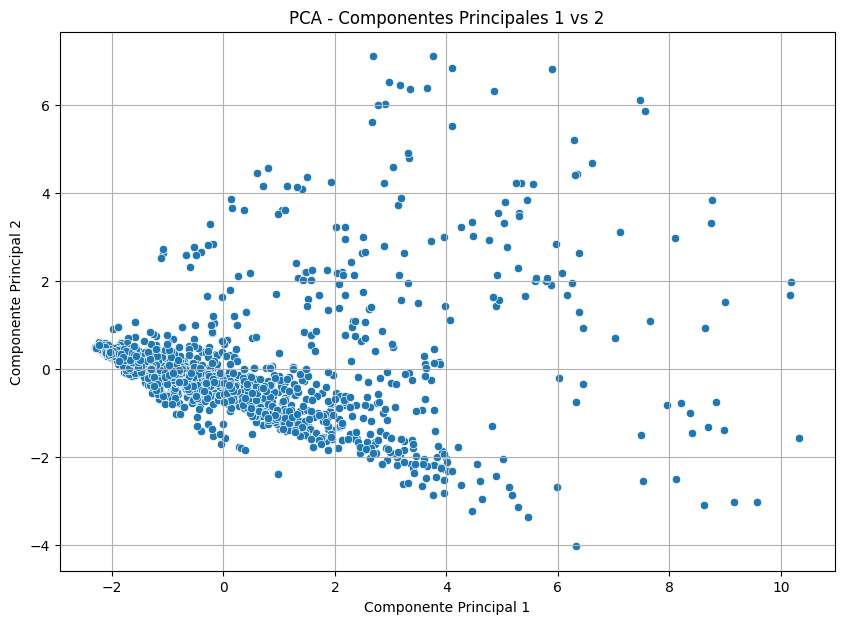

Varianza explicada por cada componente: [0.63516887 0.20766281 0.07324003 0.03989998]
Varianza total explicada: 0.9559716901061472


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ajustar el Pipeline con los datos de entrenamiento
preprocessor_with_pca.fit(X_train_2)

# 2. Transformar los datos de entrenamiento
X_train_pca = preprocessor_with_pca.transform(X_train_2)

# Convertir la transformación a un DataFrame para facilitar la graficación
# Asumimos que el PCA reduce a 2 componentes principales para la visualización
df_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Graficar las dos primeras componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'])
plt.title('PCA - Componentes Principales 1 vs 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

pca = preprocessor_with_pca.named_transformers_['num'].named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza total explicada: {explained_variance_ratio.sum()}")

### Regresión lineal

In [24]:
# Crear el pipeline con PCA y regresión lineal
Modelo_pca_rl = Pipeline(steps=[
    ('preprocessor', preprocessor_with_pca),
    ('regressor', LinearRegression())
    ])

# Entrenar el modelo
Modelo_pca_rl.fit(X_train_2, y_train_2)

# Hacer predicciones
y_pred_pca_rl = Modelo_pca_rl.predict(X_test_1)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_2, y_pred_pca_rl):
    # Evitar división por cero
    nonzero_indices = y_test_2 != 0
    y_test_nonzero = y_test_2[nonzero_indices]
    y_pred_rl_nonzero = y_pred_pca_rl[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_rl_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_2, y_pred_pca_rl)
mae = mean_absolute_error(y_test_2, y_pred_pca_rl)
mape = mean_absolute_percentage_error(y_test_2, y_pred_pca_rl)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.84
MAE (Mean Absolute Error): 9249067
MAPE (Mean Absolute Percentage Error): 70.57%


### Random Forest

In [25]:
# Crear el pipeline completo con el preprocesador y el modelo
model_rf_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_with_pca),
    ('model', RandomForestRegressor())
])

# Ajustar el pipeline con los datos de entrenamiento
model_rf_2.fit(X_train_2, y_train_2)

# Hacer predicciones y evaluar el modelo
y_pred_pca_rf = model_rf_2.predict(X_test_2)

# Calcular MAPE
def mean_absolute_percentage_error(y_test_2, y_pred_pca_rf):
    # Evitar división por cero
    nonzero_indices = y_test_2 != 0
    y_test_nonzero = y_test_2[nonzero_indices]
    y_pred_rf_nonzero = y_pred_pca_rf[nonzero_indices]
    return np.mean(np.abs((y_test_nonzero - y_pred_rf_nonzero) / y_test_nonzero)) * 100
    
# Calcular otras métricas
r2 = r2_score(y_test_2, y_pred_pca_rf)
mae = mean_absolute_error(y_test_2, y_pred_pca_rf)
mape = mean_absolute_percentage_error(y_test_2, y_pred_pca_rf)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.90
MAE (Mean Absolute Error): 6732035
MAPE (Mean Absolute Percentage Error): 50.30%


## Modelo de ensamble

In [ ]:
# Modelos base
estimators_2 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Modelo meta
meta_regressor_2 = Ridge()

# Crear el modelo ensemble
ensemble_model_2 = StackingRegressor(
    estimators=estimators_2,
    final_estimator=meta_regressor_2
)

# Pipeline con preprocesamiento y modelo ensemble
model_ensemble_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ensemble_model_2)
])

# Entrenar el modelo
model_ensemble_2.fit(X_train_2, y_train_2)

# Hacer predicciones
y_pred_ensemble_2 = model_ensemble_2.predict(X_test_2)

# Calcular otras métricas
r2_2 = r2_score(y_test_2, y_pred_ensemble_2)
mae_2 = mean_absolute_error(y_test_2, y_pred_ensemble_2)
mape_2 = mean_absolute_percentage_error(y_test_2, y_pred_ensemble_2)

# Imprimir métricas
print(f"R² (R-squared): {r2_2:.2f}")
print(f"MAE (Mean Absolute Error): {mae_2:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape_2:.2f}%")

## Conclusiones:

- Pérdida de Información: El PCA reduce la dimensionalidad de los datos, lo que puede llevar a la pérdida de información relevante para el modelo. Si las características eliminadas eran importantes, el rendimiento del modelo puede disminuir.

- Selección de Componentes: Es posible que no hayas seleccionado el número óptimo de componentes principales. Si seleccionas muy pocos componentes, puedes perder información importante; si seleccionas demasiados, puedes no obtener los beneficios de la reducción de dimensionalidad.
  
- Relación No Lineal: El PCA es una técnica lineal, lo que significa que solo puede capturar relaciones lineales entre las características. Si tus datos tienen relaciones no lineales, el PCA puede no ser efectivo.

# Modelo con reducción de variables:

In [34]:
# 2. BASE DE DATOS

# Base de datos inicial:
df_final

df_Ambulatorio_filtered = df_final[df_final['Ambulatorio'] == 'SI']

# Base de datos para mi modelo:
df_modelo_3 = df_Ambulatorio_filtered [['Ambulatorio', 'Nivel ciudad', '24 horas', 'Tipo CAF',
                        'Cantidad clientes', 'Consorcio', 'Ubicacion', 'Cantidad inventario',
                        'Area', 'Fo_dia', 'Ingreso', 'Gasto total','Valor inventario']]

# Eliminadas: 'Costo' debido a su alta relación con el Ingreso. 
# Eliminadas: 'Item_dia' debido a su alta relación con el "Fo_dia", esta ultima tiene una menor varianza. 
# Eliminadas: 'Mes' tiene una baja correlación con la variable obejtivo.
# Eliminadas: 'Alto volumen' tiene una baja correlación con la variable obejtivo.

# Filtrar las filas donde 'AREA' es mayor a 80
df_modelo_3 = df_modelo_3[df_modelo_3['Fo_dia'] < 1500]

# 3. OBTENGO VARIABLES DE CARACTERÍSTICAS Y OBJETIVO (PARA ENTRENAMIENTO Y PRUEBA)

X_3 = df_modelo_3.drop('Gasto total', axis=1)
y_3 = df_modelo_3['Gasto total']

# 4. PROCESAMIENTO DE VARIABLES

var_categoricas_3 = ['Ambulatorio', 'Nivel ciudad', '24 horas', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion'] 

var_numericas_3 = ['Cantidad inventario', 'Area', 'Fo_dia', 'Ingreso', 'Valor inventario']

# Preprocesamiento para variables categóricas
categorical_transformer_3 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocesamiento para variables numéricas
numeric_transformer_3 = Pipeline(steps=[('scaler', StandardScaler())])

# Combinar los preprocesadores en un único paso
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_3, var_numericas_3),
        ('cat', categorical_transformer_3, var_categoricas_3)
    ])

# 5. DIVIDIR: ENTRENAMIENTO Y PRUEBA
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

## Regresión lineal

In [35]:
# Crear el pipeline con preprocesamiento y regresión lineal
model_lr_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model_lr_3.fit(X_train_3, y_train_3)

# Hacer predicciones
y_pred_lr_3 = model_lr_3.predict(X_test_3)

# Calcular otras métricas
r2 = r2_score(y_test_3, y_pred_lr_3)
mae = mean_absolute_error(y_test_3, y_pred_lr_3)
mape = mean_absolute_percentage_error(y_test_3, y_pred_lr_3)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.83
MAE (Mean Absolute Error): 8087595
MAPE (Mean Absolute Percentage Error): 0.27%


## Random Forest

In [36]:
# Crear el pipeline con preprocesamiento y random forest
model_rf_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model_rf_3.fit(X_train_3, y_train_3)

# Hacer predicciones
y_pred_rf_3 = model_rf_3.predict(X_test_3)

# Calcular otras métricas
r2 = r2_score(y_test_3, y_pred_rf_3)
mae = mean_absolute_error(y_test_3, y_pred_rf_3)
mape = mean_absolute_percentage_error(y_test_3, y_pred_rf_3)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.92
MAE (Mean Absolute Error): 5376541
MAPE (Mean Absolute Percentage Error): 0.18%


## Modelo de ensamble

In [37]:
# Modelos base
estimators_3 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Modelo meta
meta_regressor_3 = Ridge()

# Crear el modelo ensemble
ensemble_model_3 = StackingRegressor(
    estimators=estimators_3,
    final_estimator=meta_regressor_3
)

# Pipeline con preprocesamiento y modelo ensemble
model_ensemble_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('regressor', ensemble_model_3)
])

# Entrenar el modelo
model_ensemble_3.fit(X_train_3, y_train_3)

# Hacer predicciones
y_pred_ensemble_3 = model_ensemble_3.predict(X_test_3)

# Calcular otras métricas
r2 = r2_score(y_test_3, y_pred_ensemble_3)
mae = mean_absolute_error(y_test_3, y_pred_ensemble_3)
mape = mean_absolute_percentage_error(y_test_3, y_pred_ensemble_3)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

R² (R-squared): 0.92
MAE (Mean Absolute Error): 5453889
MAPE (Mean Absolute Percentage Error): 0.18%


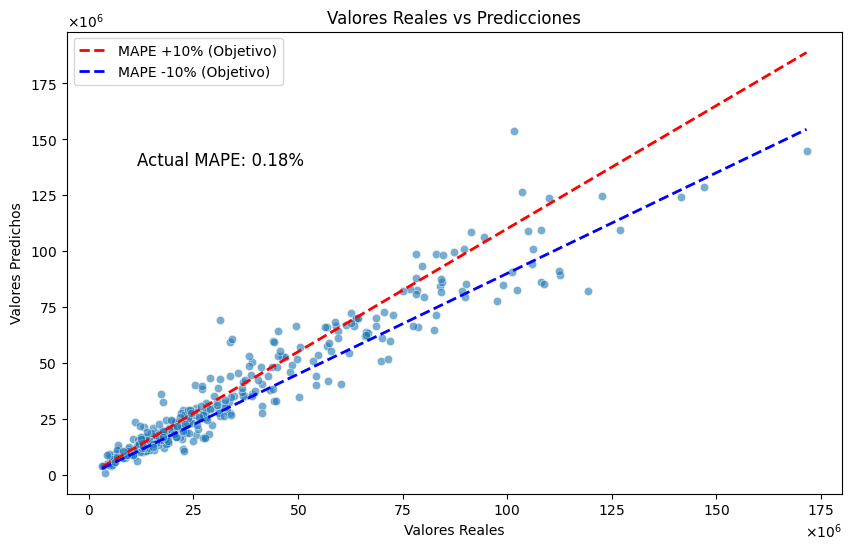

In [38]:
from matplotlib.ticker import ScalarFormatter
# Definir el MAPE objetivo
target_mape = 10  # Objetivo del 10%

# Gráfico de valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_3, y=y_pred_ensemble_3, alpha=0.6)

# Línea de referencia para el MAPE objetivo del 10%
x_values = np.linspace(min(y_test_3), max(y_test_3), 100)
y_values_upper_target = x_values * (1 + target_mape / 100)
y_values_lower_target = x_values * (1 - target_mape / 100)

# Dibujar las líneas superior e inferior para el MAPE objetivo
plt.plot(x_values, y_values_upper_target, color='red', linestyle='--', linewidth=2, label=f'MAPE +{target_mape}% (Objetivo)')
plt.plot(x_values, y_values_lower_target, color='blue', linestyle='--', linewidth=2, label=f'MAPE -{target_mape}% (Objetivo)')

# Anotación del MAPE actual (ajustada a la izquierda)
plt.text(
    x=min(y_test_3) + (max(y_test_3) - min(y_test_3)) * 0.05,
    y=min(y_pred_ensemble_3) + (max(y_pred_ensemble_3) - min(y_pred_ensemble_3)) * 0.9,
    s=f'Actual MAPE: {mape:.2f}%',
    fontsize=12,
    color='black'
)

plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predicciones')
plt.legend()


# Ajustar la escala de los ejes
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='both', scilimits=(6,6))

### Ajuste

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor

# Suponiendo que ya has hecho las predicciones y calculado los errores
# Calcular los errores
errores = y_pred_ensemble_3 - y_test_3

# Convertir los errores en un DataFrame
resultados = pd.DataFrame({
    'Predicción': y_pred_ensemble_3,
    'Real': y_test_3,
    'Error': errores
})

# Ajustar la configuración de pandas para mostrar los números en formato float con 0 decimales
pd.options.display.float_format = '{:.0f}'.format

# Definir los índices a eliminar
num_indices_a_eliminar = 10  # Por ejemplo, eliminar los 10 mayores errores
indices_a_eliminar = resultados_ordenados.head(num_indices_a_eliminar).index

# Ordenar los resultados por el valor absoluto del error, de mayor a menor
resultados_ordenados = resultados.reindex(resultados['Error'].abs().sort_values(ascending=False).index)

# Contar los datos eliminados
num_datos_eliminados = len(indices_a_eliminar)
print(f"Número de datos eliminados: {num_datos_eliminados}")

# Mostrar los primeros resultados con mayor error
print(resultados_ordenados.head(20))

Número de datos eliminados: 10
      Predicción      Real     Error
1582   153839924 101535728  52304196
1876    69373106  31455577  37917529
1932    82267415 119450611 -37183196
1767   144684043 171579548 -26895505
1828    60824924  34190063  26634861
1425    59394875  33717943  25676932
1818    85363250 108708374 -23345124
423     89269144 112591243 -23322099
2004   126326596 103628210  22698386
655     86278666 108210220 -21931554
1435    90906275 112476722 -21570447
1921    98845820  78184205  20661615
96      77473130  97531326 -20058196
2095    40405457  60351720 -19946263
1277    51779450  71625138 -19845688
1416    82734778 102473652 -19738874
1645    64497227  45173865  19323362
2128    36190676  17146422  19044254
2114    51004771  69905671 -18900900
1367   128707397 146973116 -18265719


In [46]:
# Establecer el umbral para los errores
umbral = 20000000

# Obtener los índices de los datos con errores absolutos superiores al umbral
indices_a_eliminar = resultados[resultados['Error'].abs() > umbral].index

# Eliminar estos datos del conjunto de prueba
X_test_filtered = X_test_3.drop(index=indices_a_eliminar)
y_test_filtered = y_test_3.drop(index=indices_a_eliminar)

# Si también deseas eliminar los datos del conjunto de entrenamiento, repite el proceso para X_train_3 y y_train_3
X_train_filtered = X_train_3[~X_train_3.index.isin(indices_a_eliminar)]
y_train_filtered = y_train_3[~y_train_3.index.isin(indices_a_eliminar)]

# Reentrenar el modelo con los datos filtrados
model_ensemble_3.fit(X_train_filtered, y_train_filtered)

# Hacer predicciones con el modelo ajustado
y_pred_ensemble_filtered = model_ensemble_3.predict(X_test_filtered)

# Calcular métricas
r2_filtered = r2_score(y_test_filtered, y_pred_ensemble_filtered)
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_ensemble_filtered)
mape_filtered = mean_absolute_percentage_error(y_test_filtered, y_pred_ensemble_filtered) * 100

# Imprimir métricas
print(f"R² (R-squared) sin datos con errores absolutos superiores a {umbral}: {r2_filtered:.2f}")
print(f"MAE (Mean Absolute Error) sin datos con errores absolutos superiores a {umbral}: {mae_filtered:.0f}")
print(f"MAPE (Mean Absolute Percentage Error) sin datos con errores absolutos superiores a {umbral}: {mape_filtered:.2f}%")

R² (R-squared) sin datos con errores absolutos superiores a 20000000: 0.94
MAE (Mean Absolute Error) sin datos con errores absolutos superiores a 20000000: 4610451
MAPE (Mean Absolute Percentage Error) sin datos con errores absolutos superiores a 20000000: 16.70%


In [49]:
# Entrenar el modelo en el conjunto de entrenamiento original
model_ensemble_3.fit(X_train_3, y_train_3)

# Hacer predicciones en el conjunto de entrenamiento
y_pred_train = model_ensemble_3.predict(X_train_3)

# Hacer predicciones en el conjunto de prueba original
y_pred_test = model_ensemble_3.predict(X_test_3)

# Calcular métricas para el conjunto de entrenamiento
r2_train = r2_score(y_train_3, y_pred_train)
mae_train = mean_absolute_error(y_train_3, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train_3, y_pred_train) * 100

# Calcular métricas para el conjunto de prueba original
r2_test = r2_score(y_test_3, y_pred_test)
mae_test = mean_absolute_error(y_test_3, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test_3, y_pred_test) * 100

# Imprimir métricas
print(f"R² (R-squared) en el conjunto de entrenamiento: {r2_train:.2f}")
print(f"MAE (Mean Absolute Error) en el conjunto de entrenamiento: {mae_train:.0f}")
print(f"MAPE (Mean Absolute Percentage Error) en el conjunto de entrenamiento: {mape_train:.2f}%")

print(f"R² (R-squared) en el conjunto de prueba: {r2_test:.2f}")
print(f"MAE (Mean Absolute Error) en el conjunto de prueba: {mae_test:.0f}")
print(f"MAPE (Mean Absolute Percentage Error) en el conjunto de prueba: {mape_test:.2f}%")


R² (R-squared) en el conjunto de entrenamiento: 0.99
MAE (Mean Absolute Error) en el conjunto de entrenamiento: 2274670
MAPE (Mean Absolute Percentage Error) en el conjunto de entrenamiento: 8.91%
R² (R-squared) en el conjunto de prueba: 0.92
MAE (Mean Absolute Error) en el conjunto de prueba: 5453889
MAPE (Mean Absolute Percentage Error) en el conjunto de prueba: 17.56%


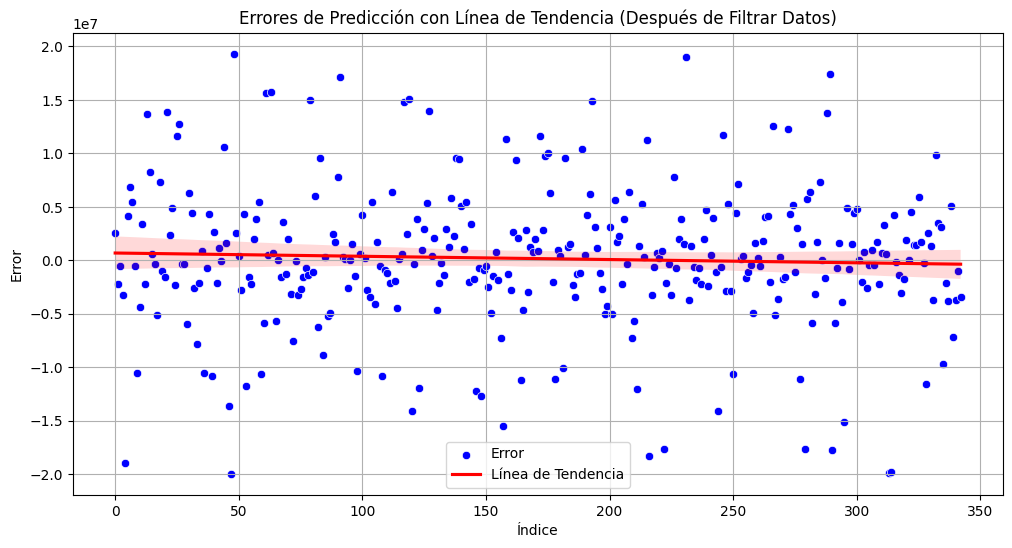

In [47]:
# Calcular errores después de filtrar
errores_filtrados = y_pred_ensemble_filtered - y_test_filtered

# Convertir los errores en un DataFrame
resultados_filtrados = pd.DataFrame({
    'Predicción': y_pred_ensemble_filtered,
    'Real': y_test_filtered,
    'Error': errores_filtrados
})

# Graficar los errores con la línea de tendencia
plt.figure(figsize=(12, 6))

# Graficar los errores en un gráfico de dispersión
sns.scatterplot(x=np.arange(len(resultados_filtrados)), y=resultados_filtrados['Error'], color='blue', label='Error')

# Añadir una línea de tendencia (regresión lineal)
sns.regplot(x=np.arange(len(resultados_filtrados)), y=resultados_filtrados['Error'], scatter=False, color='red', label='Línea de Tendencia')

plt.title('Errores de Predicción con Línea de Tendencia (Después de Filtrar Datos)')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Modelo con datos promediados y reducción de variables:

In [ ]:
# Agrupar por 'Codigo'
grouped = df_final.groupby('Codigo')

# Calcular el promedio para las variables numéricas
mean_numerics = grouped[variables_numericas].mean()

# Calcular la moda para las variables categóricas
mode_categoricals = grouped[df_categoricas.columns].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Concatenar los resultados de las medias y las modas
df_final_agrupado = pd.concat([mean_numerics, mode_categoricals], axis=1)

df_Ambulatorio_filtered_4 = df_final_agrupado[df_final_agrupado['Ambulatorio'] == 'SI']

# Base de datos para mi modelo:
df_modelo_4 = df_Ambulatorio_filtered_4 [['Ambulatorio', 'Nivel ciudad', '24 horas', 'Tipo CAF',
                        'Cantidad clientes', 'Consorcio', 'Ubicacion', 'Cantidad inventario',
                        'Area', 'Fo_dia', 'Ingreso', 'Gasto total','Valor inventario']]

# Eliminadas: 'Costo' debido a su alta relación con el Ingreso. 
# Eliminadas: 'Item_dia' debido a su alta relación con el "Fo_dia", esta ultima tiene una menor varianza. 
# Eliminadas: 'Mes' tiene una baja correlación con la variable obejtivo.
# Eliminadas: 'Alto volumen' tiene una baja correlación con la variable obejtivo.

# Filtrar las filas donde 'AREA' es mayor a 80
#df_modelo_4 = df_modelo_4[df_modelo_4['Fo_dia'] < 1500]

# 3. OBTENGO VARIABLES DE CARACTERÍSTICAS Y OBJETIVO (PARA ENTRENAMIENTO Y PRUEBA)

X_4 = df_modelo_4.drop('Gasto total', axis=1)
y_4 = df_modelo_4['Gasto total']

# 4. PROCESAMIENTO DE VARIABLES

var_categoricas_4 = ['Ambulatorio', 'Nivel ciudad', '24 horas', 'Tipo CAF',
                     'Cantidad clientes', 'Consorcio', 'Ubicacion'] 

var_numericas_4 = ['Cantidad inventario', 'Area', 'Fo_dia', 'Ingreso', 'Valor inventario']

# Preprocesamiento para variables categóricas
categorical_transformer_4 = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocesamiento para variables numéricas
numeric_transformer_4 = Pipeline(steps=[('scaler', StandardScaler())])

# Combinar los preprocesadores en un único paso
preprocessor_4 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_4, var_numericas_4),
        ('cat', categorical_transformer_4, var_categoricas_4)
    ])

# 5. DIVIDIR: ENTRENAMIENTO Y PRUEBA
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.15, random_state=42)

## Regresión lineal

In [ ]:
# Crear el pipeline con preprocesamiento y regresión lineal
model_lr_4 = Pipeline(steps=[
    ('preprocessor', preprocessor_4),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model_lr_4.fit(X_train_4, y_train_4)

# Hacer predicciones
y_pred_lr_4 = model_lr_4.predict(X_test_4)
 
# Calcular otras métricas
r2 = r2_score(y_test_4, y_pred_lr_4)
mae = mean_absolute_error(y_test_4, y_pred_lr_4)
mape = mean_absolute_percentage_error(y_test_4, y_pred_lr_4)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

## Random Forest

In [ ]:
# Crear el pipeline con preprocesamiento y random forest
model_rf_4 = Pipeline(steps=[
    ('preprocessor', preprocessor_4),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model_rf_4.fit(X_train_4, y_train_4)

# Hacer predicciones
y_pred_rf_4 = model_rf_4.predict(X_test_4)
 
# Calcular otras métricas
r2 = r2_score(y_test_4, y_pred_rf_4)
mae = mean_absolute_error(y_test_4, y_pred_rf_4)
mape = mean_absolute_percentage_error(y_test_4, y_pred_rf_4)

# Imprimir métricas
print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

## Modelo de ensamble

In [ ]:
# Modelos base
estimators_4 = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Modelo meta
meta_regressor_4 = Ridge()

# Crear el modelo ensemble
ensemble_model_4 = StackingRegressor(
    estimators=estimators_4,
    final_estimator=meta_regressor_4
)

# Pipeline con preprocesamiento y modelo ensemble
model_ensemble_4 = Pipeline(steps=[
    ('preprocessor', preprocessor_4),
    ('regressor', ensemble_model_4)
])

# Entrenar el modelo
model_ensemble_4.fit(X_train_4, y_train_4)

# Hacer predicciones
y_pred_ensemble_4 = model_ensemble_4.predict(X_test_4)
    
# Calcular y mostrar las métricas de rendimiento
r2 = r2_score(y_test_4, y_pred_ensemble_4)
mae = mean_absolute_error(y_test_4, y_pred_ensemble_4)
mape = mean_absolute_percentage_error(y_test_4, y_pred_ensemble_4)

print(f"R² (R-squared): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.0f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

## Conclusiones:

Se evidencia que el modelo que ofreció mejor resultado corresponde al Modelo del ensamble.